In [60]:
from keras import *
import keras.preprocessing.image as im
import cv2 as cv
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib notebook

In [56]:
### Plot charts or images, wrapper for matplotlib axes and figs 
def get_ax(rows=1, cols=1,figsize=(4,4), imgmode=False, returnfig=False):
    fig, axes = plt.subplots(figsize=figsize, dpi = 100, nrows=rows, ncols=cols)
    if imgmode:
        if rows == 1 and cols == 1:
            axes.clear()
            axes.get_xaxis().set_visible(False)
            axes.get_yaxis().set_visible(False)
        else:
            for ax in axes:
                if (isinstance(ax,np.ndarray)):
                    for a in ax:
                        a.clear()
                        a.get_xaxis().set_visible(False)
                        a.get_yaxis().set_visible(False)
                else:
                    ax.clear()
                    ax.get_xaxis().set_visible(False)
                    ax.get_yaxis().set_visible(False)
    return (fig, axes) if returnfig else axes

# label_bar and label_barh taken from = https://stackoverflow.com/questions/30228069/how-to-display-the-value-of-the-bar-on-each-bar-with-pyplot-barh
def label_bar(ax, bars, text_format, **kwargs):
    """
    Attach a text label to each bar displaying its y value
    """
    max_y_value = ax.get_ylim()[1]
    inside_distance = max_y_value * 0.05
    outside_distance = max_y_value * 0.01

    for bar in bars:
        text = text_format.format(bar.get_height())
        text_x = bar.get_x() + bar.get_width() / 2

        is_inside = bar.get_height() >= max_y_value * 0.15
        if is_inside:
            color = "white"
            text_y = bar.get_height() - inside_distance
        else:
            color = "black"
            text_y = bar.get_height() + outside_distance

        ax.text(text_x, text_y, text, ha='center', va='bottom', color=color, **kwargs)


def label_barh(ax, bars, text_format, **kwargs):
    """
    Attach a text label to each bar displaying its y value
    Note: label always outside. otherwise it's too hard to control as numbers can be very long
    """
    max_x_value = ax.get_xlim()[1]
    distance = max_x_value * 0.0025

    for bar in bars:
        text = text_format.format(bar.get_width())

        text_x = bar.get_width() + distance
        text_y = bar.get_y() + bar.get_height() / 2

        ax.text(text_x, text_y, text, va='center', **kwargs)

# Create generators

In [57]:
train_datagen = im.ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
        'model_training/dataset/Training',
        target_size=(48, 48),
        batch_size=32,
        class_mode=None)

Found 28273 images belonging to 6 classes.


<IPython.core.display.Javascript object>


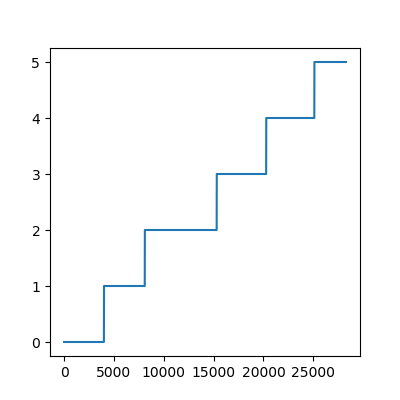

In [79]:
get_ax().plot(train_generator.labels.T)

In [83]:
train_generator.labels.transpose()

array([0, 0, 0, ..., 5, 5, 5], dtype=int32)